In [1]:
import os, re
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted 
import numpy as np
import torch

import time
import sys
sys.path.append('../')
# from model2 import Model

In [2]:
def print_result(hvac, coil, ppd):
    print(' HVAC POWER:', hvac, 'BASELINE DIFF:', baseline_hvac - hvac )
    print(' COIL POWER:', coil, 'BASELINE DIFF:', baseline_coil - coil)
    print('        PPD:', ppd,  'BASELINE DIFF:', ppd - baseline_ppd)

 HVAC POWER: 14057074.067551777 BASELINE DIFF: 0.0
 COIL POWER: 8234694.14150146 BASELINE DIFF: 0.0
        PPD: 30.57441092679799 BASELINE DIFF: 0.0


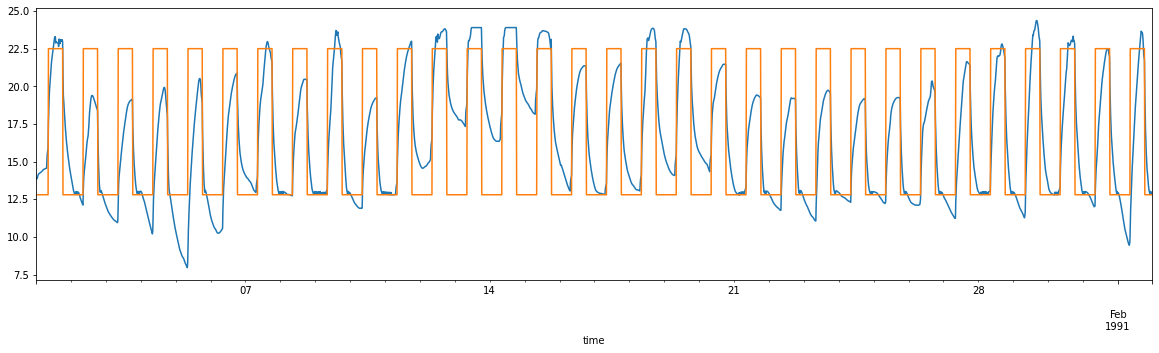

In [3]:
baseline = pd.read_csv('../baselines/heating_blindsFalse.csv', index_col='time')
baseline.index = pd.to_datetime(baseline.index)
baseline = baseline[:'1991-02-01 23:45:00']
# baseline = baseline['1991-07-01':'1991-07-31 23:45:000']

baseline['Indoor Temp.'].plot(figsize=(20,5))
baseline['Indoor Temp. Setpoint'].plot()

baseline_coil = baseline['Heat Coil Power'].sum()
baseline_hvac = baseline['HVAC Power'].sum()
baseline_ppd = baseline[baseline["Occupancy Flag"]==1]["PPD"].mean()

print_result(baseline_hvac, baseline_coil, baseline_ppd)

179


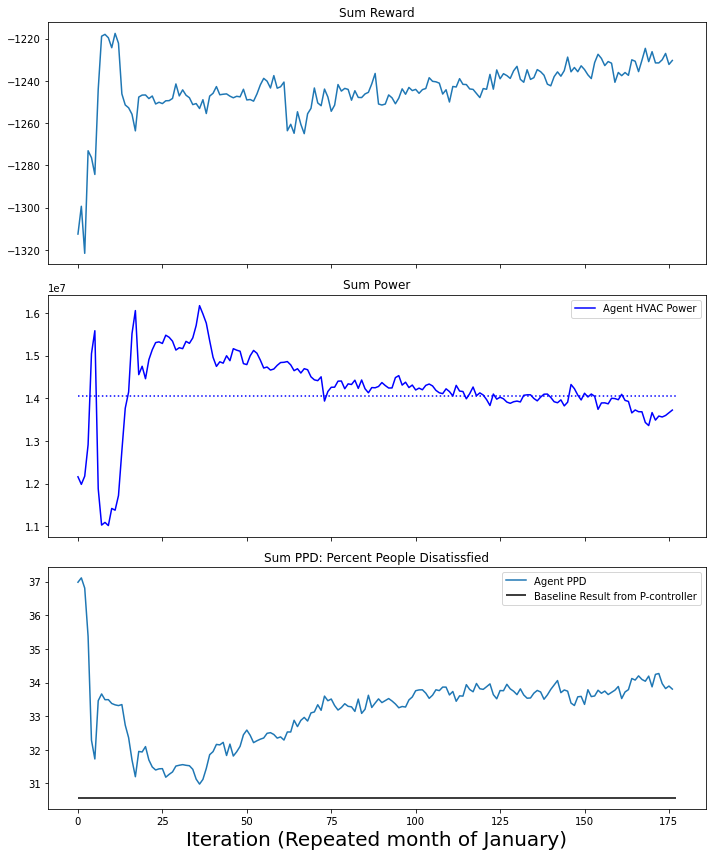

In [9]:
root = '../rl_results/SAC_leaky_heating_blindsFalse_dlightingFalse_0.1_1.0_0.5/'

# while True:
rewards = []
hvacs = []
hcoils = []
ccoils = []
ppds  = []
print(len(os.listdir(root)))


x = os.listdir(root)
for csv in natsorted(x):
    if 'csv' in csv:
        df = pd.read_csv(root + csv, index_col='time')
        df.index = pd.to_datetime(df.index)

        rewards.append(df['reward'].sum())

        df_hcoil = df['Heat Coil Power'].sum()
        df_ccoil = df['Cool Coil Power'].sum()
        df_hvac = df['HVAC Power'].sum()
        df_ppd = df[df["Occupancy Flag"]==1]["PPD"].mean()

        hvacs.append(df_hvac)
        hcoils.append(df_hcoil)
        ccoils.append(df_ccoil)
        ppds.append(df_ppd)

fig, axes = plt.subplots(3, figsize=(10,12), sharex=True)
# REWARD
axes[0].plot(rewards)
axes[0].set_title('Sum Reward')

# HVAC COIL
axes[1].plot(hvacs, label='Agent HVAC Power', color='b')

#  baselines
axes[1].hlines(baseline_hvac, 0, len(rewards), color='b', linestyle=':')
axes[1].legend()
axes[1].set_title('Sum Power')

# PPD
axes[2].plot(ppds, label='Agent PPD')
axes[2].set_xlabel('Iteration (Repeated month of January)', fontsize=20)
axes[2].set_title('Sum PPD: Percent People Disatissfied')
acceptible = len(df[df['Occupancy Flag'] == 1]) * 10

# baselines
axes[2].hlines(baseline_ppd, 0, len(rewards), label="Baseline Result from P-controller")
axes[2].legend()

plt.tight_layout()
plt.savefig('example_sac')
plt.show()

# time.sleep(120)

# Other

Note that these plots may not represent the case above right now, they are just here as examples

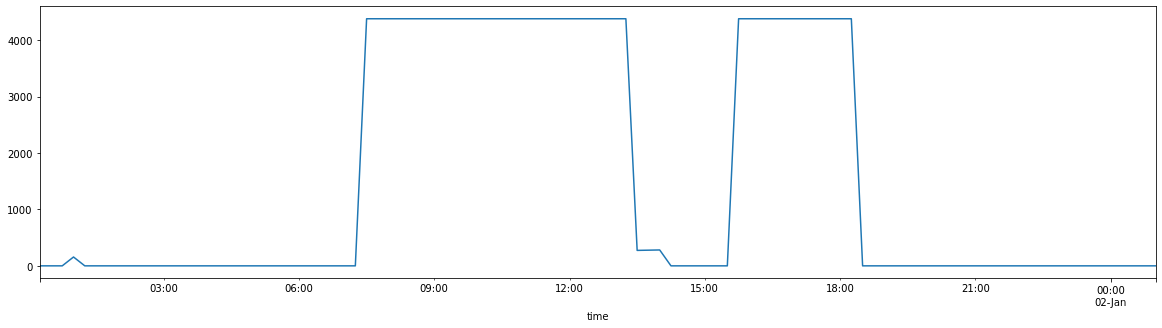

In [8]:
baseline['Heat Coil Power'][:100].plot(figsize=(20,5))

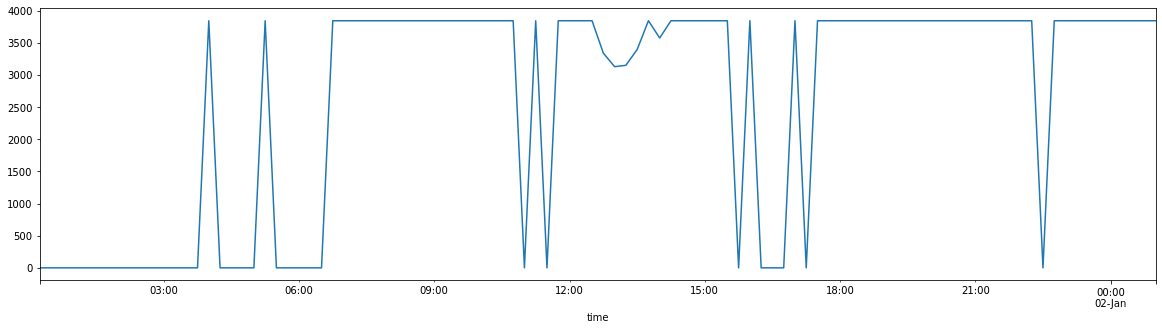

In [9]:
df['Heat Coil Power'][:100].plot(figsize=(20,5))

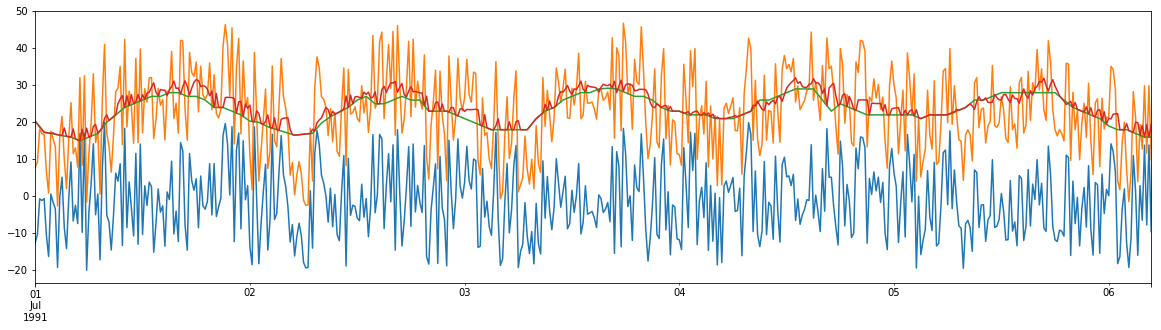

In [846]:
df[:500]['actions'].plot(figsize=(20,5))
df[:500]['sat_stpts'].plot(figsize=(20,5))
df[:500]['Outdoor Temp.'].plot(figsize=(20,5))
df[:500]['MA Temp.'].plot(figsize=(20,5))

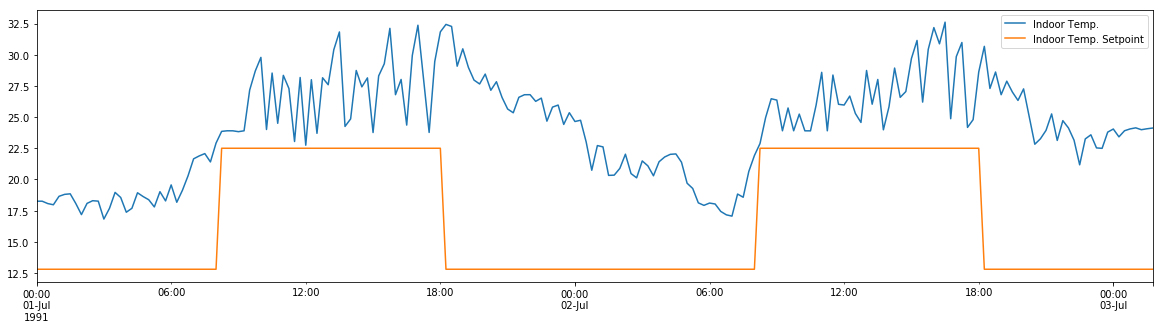

In [850]:
df[:200][['Indoor Temp.', 'Indoor Temp. Setpoint']].plot(figsize=(20,5))

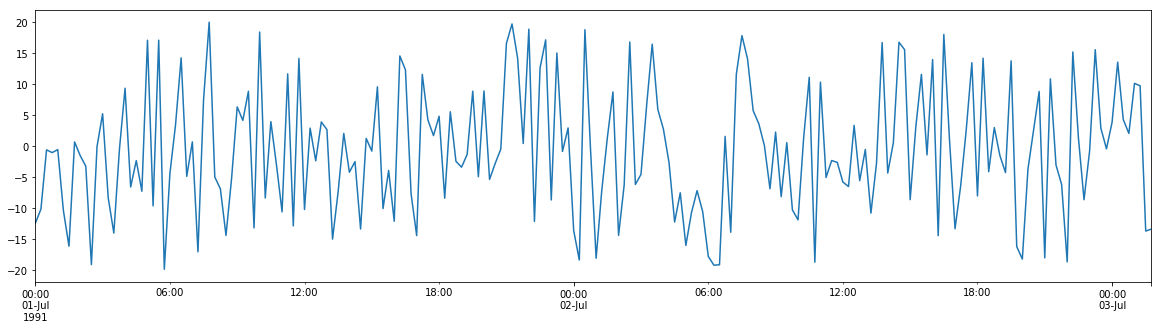

In [851]:
df[:200]['actions'].plot(figsize=(20,5))

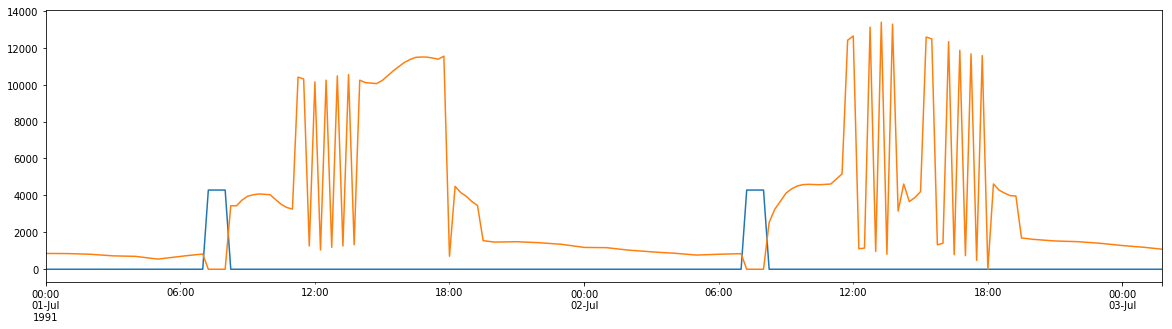

In [852]:
baseline[:200]['Heat Coil Power'].plot(figsize=(20,5))
baseline[:200]['Cool Coil Power'].plot(figsize=(20,5))

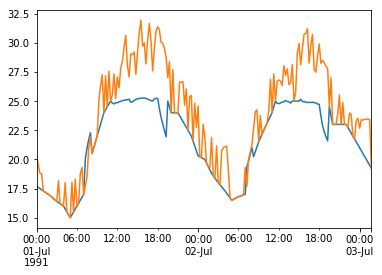

In [822]:
baseline[:200]['MA Temp.'].plot()
df[:200]['MA Temp.'].plot()

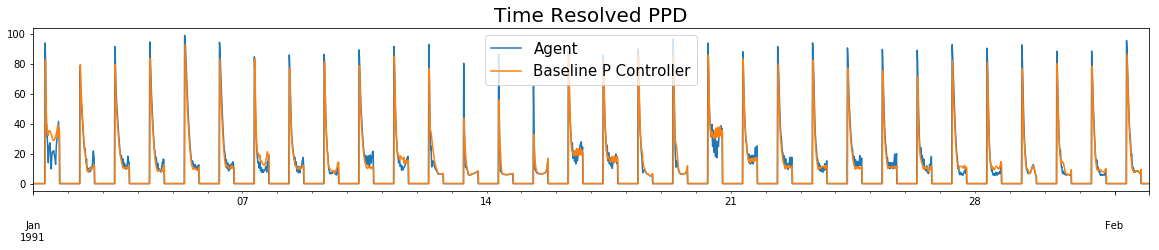

In [43]:
df_ppd = df.copy()
df_ppd.loc[df_ppd['Occupancy Flag'] == 0, 'PPD'] = 0
df_ppd['PPD'].plot(figsize=(10,3), label='Agent')

baseline_ppd = baseline.copy()
baseline_ppd.loc[baseline_ppd['Occupancy Flag'] == 0, 'PPD'] = 0
ax = baseline_ppd['PPD'].plot(figsize=(20,3), label='Baseline P Controller')

ax.set_title('Time Resolved PPD', fontsize=20)
ax.legend(prop={'size': 15})
plt.savefig('ppd')

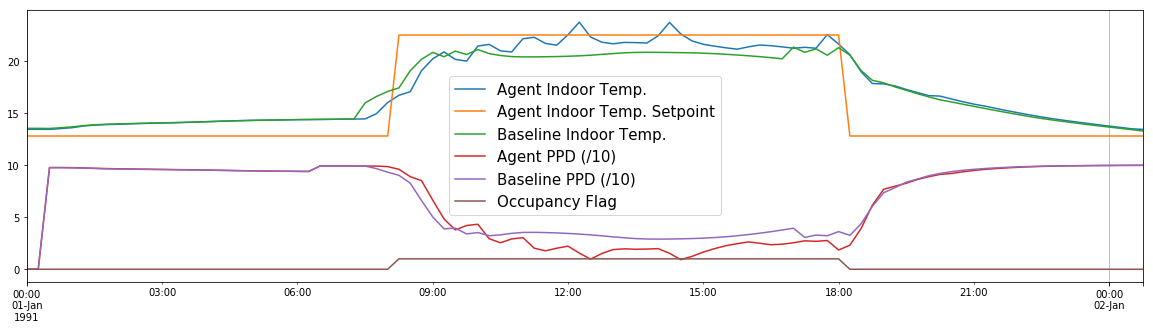

In [48]:
df[:100]['Indoor Temp.'].plot(figsize=(20,5), label='Agent Indoor Temp.')
df[:100]['Indoor Temp. Setpoint'].plot(label='Agent Indoor Temp. Setpoint')
baseline[:100]['Indoor Temp.'].plot(label='Baseline Indoor Temp.')
df['PPD scale'] = df['PPD'] / 10
baseline['PPD scale'] = baseline['PPD'] / 10
df[:100]['PPD scale'].plot(label='Agent PPD (/10)')
baseline[:100]['PPD scale'].plot(label='Baseline PPD (/10)')

df[:100]['Occupancy Flag'].plot()


plt.legend(prop={'size': 15})
plt.grid(axis='x')
plt.savefig('day')
